In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

churn_df = pd.read_csv('bankdata.csv')
# data source: https://www.kaggle.com/santoshd3/bank-customers

In [2]:
churn_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# check the unique values for each column
churn_df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [4]:
# Get target variable
y = churn_df['Exited']
# check the propotion of y = 1
print(y.sum() / y.shape[0] * 100)

20.369999999999997


In [5]:
# check missing values
churn_df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
# 'CreditScore', 'Age', 'Tenure', 'NumberOfProducts', 'Balance', 'EstimatedSalary'
churn_df[['CreditScore', 'Age', 'Tenure', 'NumOfProducts','Balance', 'EstimatedSalary']].describe()

,CreditScore,Age,Tenure,NumOfProducts,Balance,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,1.530200,76485.889288,100090.239881
std,96.653299,10.487806,2.892174,0.581654,62397.405202,57510.492818
min,350.000000,18.000000,0.000000,1.000000,0.000000,11.580000
25%,584.000000,32.000000,3.000000,1.000000,0.000000,51002.110000
50%,652.000000,37.000000,5.000000,1.000000,97198.540000,100193.915000
75%,718.000000,44.000000,7.000000,2.000000,127644.240000,149388.247500
max,850.000000,92.000000,10.000000,4.000000,250898.090000,199992.480000


In [7]:
# Feature preprocess for training
churn_df.loc[(churn_df.Gender == 'Female'), 'Gender'] = 1
churn_df.loc[(churn_df.Gender == 'Male'), 'Gender'] = 0
churn_df.loc[(churn_df.Geography == 'France'), 'Geography'] = 0
churn_df.loc[(churn_df.Geography == 'Spain'), 'Geography'] = 1
churn_df.loc[(churn_df.Geography == 'Germany'), 'Geography'] = 2
churn_df['Age'] = churn_df['Age'] // 5
churn_df['CreditScore'] = churn_df['CreditScore'] // 50
churn_df['Balance'] = churn_df['Balance'] // 10000
churn_df['EstimatedSalary'] = churn_df['EstimatedSalary'] // 10000

to_drop = ['RowNumber','CustomerId','Surname','Exited']
X = churn_df.drop(to_drop, axis=1)
X.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,12,0,1,8,2,0.0,1,1,1,10.0
1,12,1,1,8,1,8.0,1,0,1,11.0
2,10,0,1,8,8,15.0,3,1,0,11.0
3,13,0,1,7,1,0.0,2,0,0,9.0
4,17,1,1,8,2,12.0,1,1,1,7.0
5,12,1,0,8,8,11.0,2,1,0,14.0
6,16,0,0,10,7,0.0,2,1,1,1.0
7,7,2,1,5,4,11.0,4,1,0,11.0
8,10,0,0,8,4,14.0,2,0,1,7.0
9,13,0,0,5,2,13.0,1,1,1,7.0


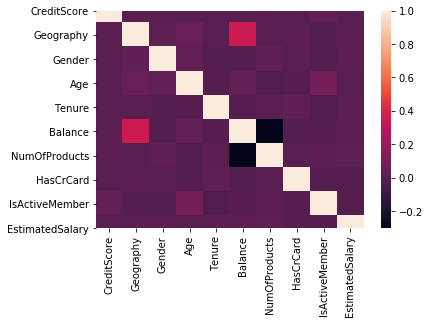

In [8]:
'''
As the result shows, there's no correlation between any two features higher than 0.9, hence we could use all the features.
'''
import seaborn as sns
# correlations between features
corr_score = X[X.keys()].corr()

# show heapmap of correlations
sns.heatmap(corr_score)

# print(corr_score)

In [9]:
X.nunique()

CreditScore        11
Geography           3
Gender              2
Age                16
Tenure             11
Balance            25
NumOfProducts       4
HasCrCard           2
IsActiveMember      2
EstimatedSalary    20
dtype: int64

In [10]:
# Split data into train set and test set
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X.values, y.values, test_size=0.25, stratify = y.values, random_state=1)

print('training data has ' + str(X_train.shape[0]) + ' samples ' + str(X_train.shape[1]) + ' features')
print('test data has ' + str(X_test.shape[0]) + ' samples ' + str(X_test.shape[1]) + ' features')

training data has 7500 samples 10 features
test data has 2500 samples 10 features


2  neighbors  0.8044  accuracy
3  neighbors  0.7904  accuracy
4  neighbors  0.8072  accuracy
5  neighbors  0.8048  accuracy
6  neighbors  0.8128  accuracy
7  neighbors  0.8136  accuracy
8  neighbors  0.8124  accuracy
9  neighbors  0.8112  accuracy
10  neighbors  0.808  accuracy
11  neighbors  0.8068  accuracy
12  neighbors  0.8084  accuracy
13  neighbors  0.81  accuracy
14  neighbors  0.81  accuracy
15  neighbors  0.8104  accuracy
16  neighbors  0.81  accuracy
17  neighbors  0.8108  accuracy
18  neighbors  0.8104  accuracy
19  neighbors  0.8088  accuracy


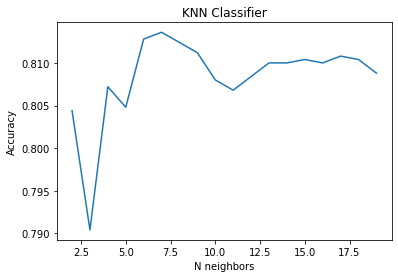

In [11]:
# KNN
'''
From the result we could see neighbors = 7 has the highest accuracy.
'''
from sklearn.neighbors import KNeighborsClassifier

res = []

for n in range(2, 20):
    knn = KNeighborsClassifier(n_neighbors = n, n_jobs = -1)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    acc = np.sum(pred == y_test) / len(y_test)
    res.append(acc)
    print(n, " neighbors ", acc.round(4), " accuracy")

plt.title("KNN Classifier")
plt.xlabel("N neighbors")
plt.ylabel("Accuracy")
plt.plot(list(range(2, 20)), res)
plt.show()

gini  criterion  1  max_depth  0.7964  accuracy
gini  criterion  2  max_depth  0.8424  accuracy
gini  criterion  3  max_depth  0.848  accuracy
gini  criterion  4  max_depth  0.8504  accuracy
gini  criterion  5  max_depth  0.8392  accuracy
gini  criterion  6  max_depth  0.8472  accuracy
gini  criterion  7  max_depth  0.8528  accuracy
gini  criterion  8  max_depth  0.8516  accuracy
gini  criterion  9  max_depth  0.8468  accuracy
gini  criterion  10  max_depth  0.8352  accuracy
entropy  criterion  1  max_depth  0.7964  accuracy
entropy  criterion  2  max_depth  0.8176  accuracy
entropy  criterion  3  max_depth  0.8176  accuracy
entropy  criterion  4  max_depth  0.8412  accuracy
entropy  criterion  5  max_depth  0.8316  accuracy
entropy  criterion  6  max_depth  0.8428  accuracy
entropy  criterion  7  max_depth  0.8472  accuracy
entropy  criterion  8  max_depth  0.8492  accuracy
entropy  criterion  9  max_depth  0.844  accuracy
entropy  criterion  10  max_depth  0.8436  accuracy


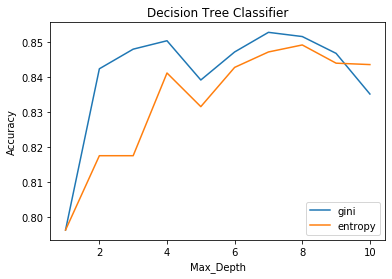

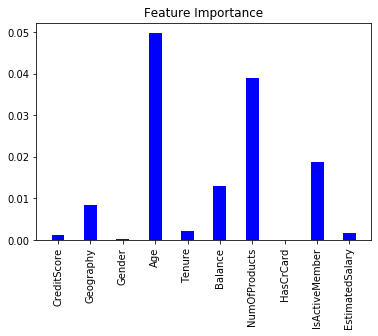

In [12]:
# Decision Tree
'''
From the result, {"gini", max_depth=7} has the best performance
Most important features: Age -> NumOfProducts -> IsActiveMember -> Balance -> Geography
'''
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

depth = list(range(1, 11))
crit = ["gini", "entropy"]
res = []

for c in crit:
    for d in depth:
        clf = DecisionTreeClassifier(max_depth=d, criterion=c)
        clf.fit(X_train, y_train)
        pred = clf.predict(X_test)
        acc = np.sum(pred == y_test) / len(y_test)
        res.append(acc)
        print(c, " criterion ", d, " max_depth ", acc.round(4), " accuracy")


plt.title("Decision Tree Classifier")
plt.xlabel("Max_Depth")
plt.ylabel("Accuracy")
plt.plot(range(1, 11), res[:10], range(1, 11), res[10:])
plt.legend(["gini", "entropy"])
plt.show()

clf = DecisionTreeClassifier(max_depth=7, criterion="gini")
clf.fit(X_train, y_train)

feat_importance = clf.tree_.compute_feature_importances(normalize=False)
x = X.keys()
x_pos = [i*2 for i, _ in enumerate(x)]
plt.bar(x_pos, feat_importance, color='blue')
plt.title("Feature Importance")
plt.xticks(x_pos, x, rotation=90)
plt.show()

# save tree image
# plt.figure(figsize=(200, 100))  
# _ = tree.plot_tree(clf)
# plt.savefig('tree.png')

In [13]:
'''
The customer whose age from 45~65 exit most especailly from 50~60.
'''
pd.crosstab(churn_df['Age']*5, churn_df['Exited']).apply(lambda r: (r/r.sum()).round(2), axis=1)

Exited,0,1
Age,,
15,0.94,0.06
20,0.91,0.09
25,0.93,0.07
30,0.92,0.08
35,0.87,0.13
40,0.76,0.24
45,0.57,0.43
50,0.43,0.57
55,0.45,0.55


In [14]:
'''
The more products, the more likely to exit.
'''
pd.crosstab(churn_df['NumOfProducts'], churn_df['Exited']).apply(lambda r: (r/r.sum()).round(2), axis=1)

Exited,0,1
NumOfProducts,,
1,0.72,0.28
2,0.92,0.08
3,0.17,0.83
4,0.00,1.00


In [15]:
'''
None active members are more likely to exit.
'''
pd.crosstab(churn_df['IsActiveMember'], churn_df['Exited']).apply(lambda r: (r/r.sum()).round(2), axis=1)

Exited,0,1
IsActiveMember,,
0,0.73,0.27
1,0.86,0.14


In [16]:
'''
Balance in 20k~30k and above 200k are more like to exit.
'''
pd.crosstab(churn_df['Balance']*10000, churn_df['Exited']).apply(lambda r: (r/r.sum()).round(2), axis=1)

Exited,0,1
Balance,,
0.0,0.86,0.14
10000.0,0.67,0.33
20000.0,0.38,0.62
30000.0,0.76,0.24
40000.0,0.67,0.33
50000.0,0.78,0.22
60000.0,0.76,0.24
70000.0,0.82,0.18
80000.0,0.82,0.18


In [17]:
'''
France = 0 Spain = 1 Germany = 2
Germany customers exit more.
'''
pd.crosstab(churn_df['Geography'], churn_df['Exited']).apply(lambda r: (r/r.sum()).round(2), axis=1)

Exited,0,1
Geography,,
0,0.84,0.16
1,0.83,0.17
2,0.68,0.32
